In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images = train_images/255.0
test_images = test_images/255.0

In [5]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

c:\Users\abhis\anaconda3\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [7]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7789 - loss: 0.6391
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8637 - loss: 0.3808
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8752 - loss: 0.3387
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8840 - loss: 0.3105
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8895 - loss: 0.2968
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8953 - loss: 0.2787
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9007 - loss: 0.2689
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9053 - loss: 0.2561
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9084 - loss: 0.2470
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9116 - loss: 0.2357


In [8]:
results = model.evaluate(test_images, test_labels)
print(results)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8868 - loss: 0.3240
[0.32829904556274414, 0.8863000273704529]


In [9]:
predictions = model.predict(test_images)
prediction_label = np.argmax(predictions, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [10]:
prediction_label

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

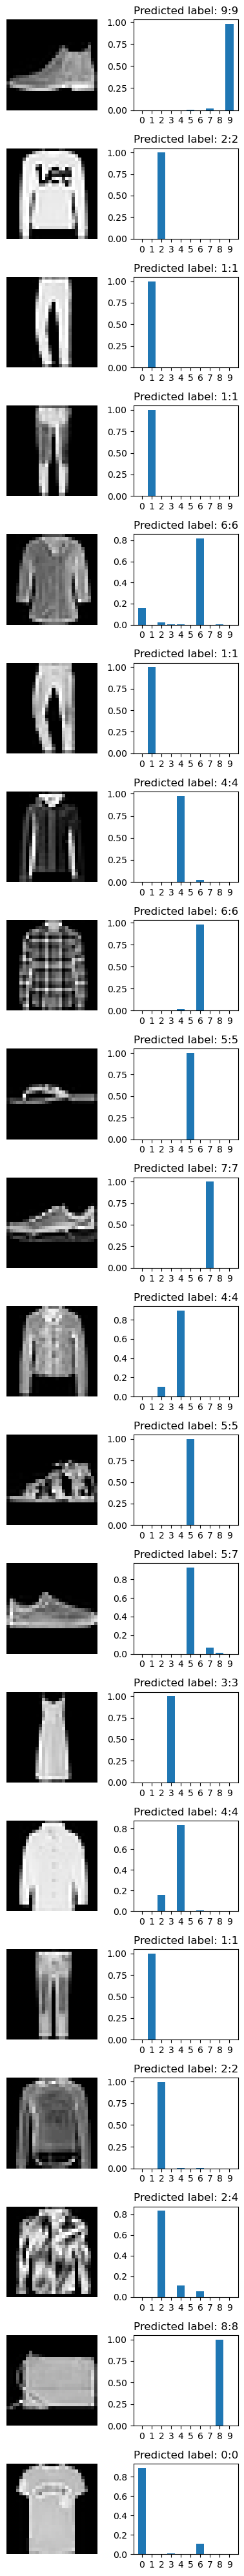

In [11]:
images = 20
plt.figure(figsize=(4, (2*images)))
for i in range(images):
    plt.subplot(images, 2, 2*i+1)
    plt.imshow(test_images[i], cmap="gray")
    plt.axis("off")

    plt.subplot(images, 2, 2*i+2)
    plt.bar(range(10), predictions[i])
    plt.xticks(range(10))
    # plt.title("prediction label": prediction_label[i])
    plt.title(f"Predicted label: {prediction_label[i]}:{test_labels[i]}")
    plt.tight_layout()